<xarray.Dataset> Size: 28MB
Dimensions:    (longitude: 2161, latitude: 1081)
Coordinates:
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04
Data variables:
    gravity    (latitude, longitude) float64 19MB 9.801e+05 ... 9.802e+05


grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


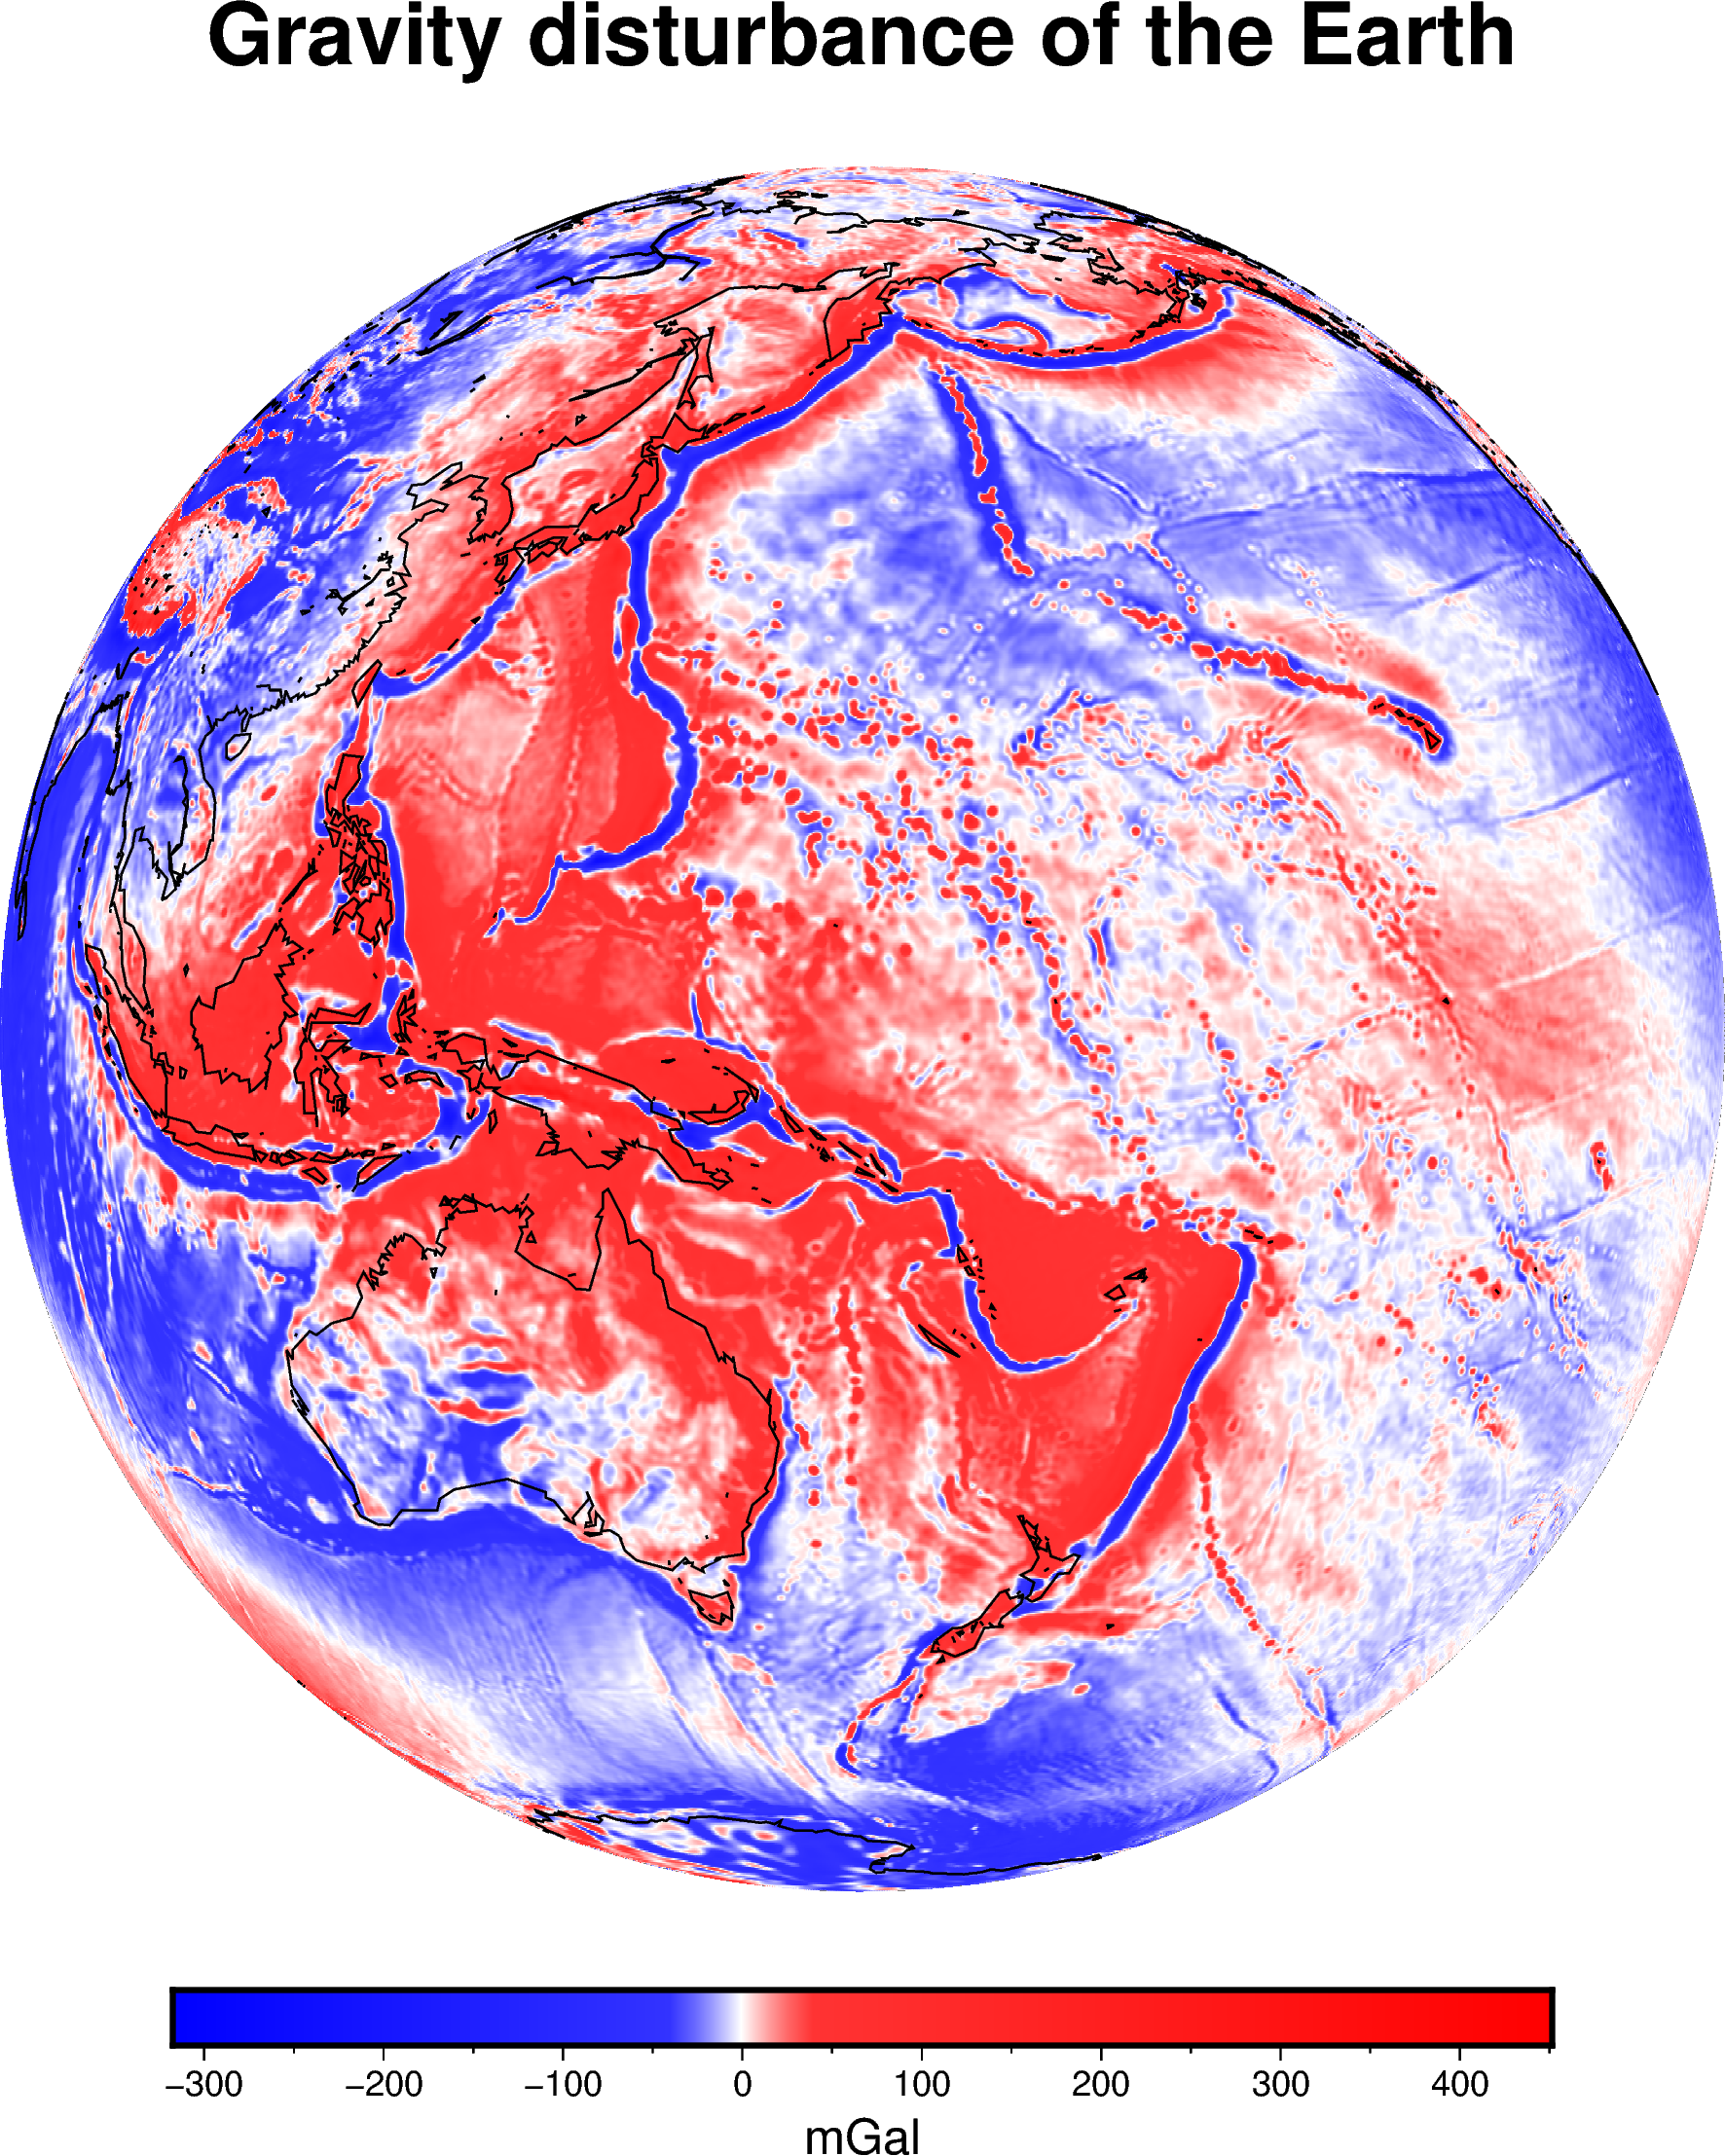

In [1]:
import boule as bl
import ensaio
import pygmt
import xarray as xr

# Load the global gravity grid
fname = ensaio.fetch_earth_gravity(version=1)
data = xr.load_dataset(fname)
print(data)

# Calculate normal gravity using the WGS84 ellipsoid
ellipsoid = bl.WGS84
gamma = ellipsoid.normal_gravity(data.latitude, data.height)
# The disturbance is the observed minus normal gravity (calculated at the
# observation point)
disturbance = data.gravity - gamma

# Make a plot of data using PyGMT
fig = pygmt.Figure()

pygmt.grd2cpt(grid=disturbance, cmap="polar", continuous=True)

title = "Gravity disturbance of the Earth"

fig.grdimage(
    region="g",
    projection="G160/0/15c",
    frame=f"+t{title}",
    grid=disturbance,
    cmap=True,
)

fig.coast(shorelines="0.5p,black", resolution="crude")

fig.colorbar(cmap=True, frame=["a100f50", "x+lmGal"])

fig.show()